# 2a: Korpustypen und Korpusverarbeitung mit NLTK

- Read & Process NLTK Corpora
- Corpus + Lexical Resources in NLTK
- Frequency Lists
- Concordances 
- Collocations


- https://www.nltk.org/book/ch01.html
- https://www.nltk.org/book/ch02.html
- https://www.nltk.org/book/ch03.html


---
## Package Info

### NLTK (Natural Language Toolkit)

https://www.nltk.org/


- open source platform for working with language data
  - access to ***linguistic resources*** (NLTK Data)
  - ***text processing libraries*** for tokenization, stemming, tagging, parsing, semantic reasoning and classification

- developed as a teaching tool
  - ***hands-on guide (NLTK book)*** introducing the basics of computational linguistics as well as the basics of programming with Python: https://www.nltk.org/book/



### numpy (Scientific Computing with Python)

https://numpy.org/


### matplotlib (Visualization with Python)

https://matplotlib.org/




---

## Introduction


###  Corpora = large structured sets of texts 
- metadata: author, year, genre etc.
- systematically collected as sample of language use

#### Types of corpora
- **general purpose corpora** 
  - BNC (British National Corpus), Brown Corpus
  - DeReKo, DWDS, Deutsches Textarchiv
- **specialized corpora** (&rarr; specific fields, e.g. law, medical corpora)
- **multilingual corpora** (&rarr; machine translation)


- https://en.wikipedia.org/wiki/List_of_text_corpora

#### Raw Text Corpora vs Annotated Corpora
  - POS-annotated (Part-of-Speech, morphological annotation)
  - Treebanks (syntactic sentence structure)


---
## Installation NLTK:

In [1]:
## Anaconda:
#conda install nltk

## pip local:
#pip install --user -U nltk
#oder
#pip3 install --user -U nltk

## pip system-wide:
#sudo -H pip3 install -U pip

---
## Loading Packages:

In [2]:
import nltk, numpy, matplotlib, re

---
## Download NLTK Corpora and other resources:

In [3]:
#nltk.download()
##e.g. "book"

---

## 1 Read & Process Corpora

---

### 1.1 Read & Process Single Text


#### Read Text from File:

In [4]:
import io
f=open('sample_texts/sample_text.txt','r',encoding='utf8')
sample_text=f.read()
f.close()
sample_text

'Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.'

#### Tokenize Text with NLTK: `nltk.word_tokenize()`

- Tokenization = splitting string in sections (usually words and punctuation marks)

In [5]:
tokens = nltk.word_tokenize(sample_text)
tokens[0:9]

['Call', 'me', 'Ishmael', '.', 'Some', 'years', 'ago—never', 'mind', 'how']

---
### 1.2 Read Corpus with `nltk.PlaintextCorpusReader`

#### Read from Multiple Files (Text Collection):

In [6]:
from nltk.corpus import PlaintextCorpusReader

# RegEx or list of file names
files = ".*\.txt"
my_corpus = PlaintextCorpusReader("sample_texts", files)
my_corpus

<PlaintextCorpusReader in '/Users/axel/Desktop/cis-lehre/cis-korpus-2022/notebooks/02_basics_py/sample_texts'>

#### Access all Words in Corpus with `nltk.words()`

In [7]:
my_corpus.words()

['Call', 'me', 'Ishmael', '.', 'Some', 'years', 'ago', ...]

In [8]:
len(my_corpus.words())

130

In [9]:
my_corpus.words('sample_text2.txt')

['There', 'now', 'is', 'your', 'insular', 'city', 'of', ...]

In [10]:
len(my_corpus.words('sample_text2.txt'))

81

In [11]:
len(my_corpus.words('sample_text.txt'))

49

---
### 1.3 Basic Methods with `nltk.Text()`:

Wrapper around token sequence

https://www.nltk.org/api/nltk.text.html#nltk.text.Text


In [12]:
my_corpus_text = nltk.Text(my_corpus.words())
my_corpus_text

<Text: Call me Ishmael . Some years ago —...>

In [13]:
my_corpus_text[0:9]

['Call', 'me', 'Ishmael', '.', 'Some', 'years', 'ago', '—', 'never']

In [14]:
type(my_corpus_text)

nltk.text.Text

In [15]:
my_corpus_text.count('is') #Count the number of times this word appears in the text.

3

In [16]:
my_corpus_text.index('is') #Find the index of the first occurrence of the word in the text.

51

In [17]:
my_corpus_text.concordance('is') #Prints a concordance for word with the specified context window. Word matching is not case-sensitive.

Displaying 3 of 3 matches:
 watery part of the world . There now is your insular city of the Manhattoes ,
 you waterward . Its extreme downtown is the battery , where that noble mole i
s the battery , where that noble mole is washed by waves , and cooled by breez


In [18]:
my_corpus_text.findall('<[Tt]here><.*><is>') #Find instances of the regular expression in the text. The text is a list of tokens, and a regexp pattern to match a single token must be surrounded by angle brackets. 

There now is


In [19]:
vocabulary = my_corpus_text.vocab()
dict(list(vocabulary.items())[0:10])

{'.': 6,
 'Call': 1,
 'Ishmael': 1,
 'Some': 1,
 'ago': 1,
 'me': 2,
 'mind': 1,
 'never': 1,
 'years': 1,
 '—': 3}

In [20]:
type(vocabulary) #entspricht FreqDist auf Tokens, s.u.

nltk.probability.FreqDist

In [21]:
from nltk import FreqDist
dict(list(FreqDist(my_corpus.words()).items())[0:10])

{'.': 6,
 'Call': 1,
 'Ishmael': 1,
 'Some': 1,
 'ago': 1,
 'me': 2,
 'mind': 1,
 'never': 1,
 'years': 1,
 '—': 3}

---
## 2. Corpus Resources in NLTK

https://www.nltk.org/howto/corpus.html#corpus-readers

---
### 2. 1 Plain Text Corpora

####  Texts as &rarr; Lists of Words (**Tokenized Text**)
https://www.nltk.org/book/ch01.html

In [22]:
text = nltk.corpus.gutenberg.words('austen-sense.txt')
text[1:20]

['Sense',
 'and',
 'Sensibility',
 'by',
 'Jane',
 'Austen',
 '1811',
 ']',
 'CHAPTER',
 '1',
 'The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in']

---
### 2.2 POS Annotated Corpora (POS = Part of Speech)

#### &rarr; Tuple lists: `(word, POS)`

https://www.nltk.org/howto/corpus.html

In [23]:
from nltk.corpus import brown

In [24]:
# POS-annotated text as list of tuples (word, pos):
print(brown.tagged_words())

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]


In [25]:
print(brown.tagged_sents()[:1])

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')]]


In [26]:
print(brown.tagged_sents(tagset='universal')[:1])

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')]]


---
### 2.3 Treebanks (Syntactically annotated corpora)

#### &rarr; List of Parse Trees

In [27]:
from nltk.corpus import treebank # Sample of Penn Treebank 
print(treebank.tagged_words('wsj_0001.mrg'))

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]


In [28]:
# Parsed text as list of trees:
print(treebank.parsed_sents('wsj_0001.mrg')[0])

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


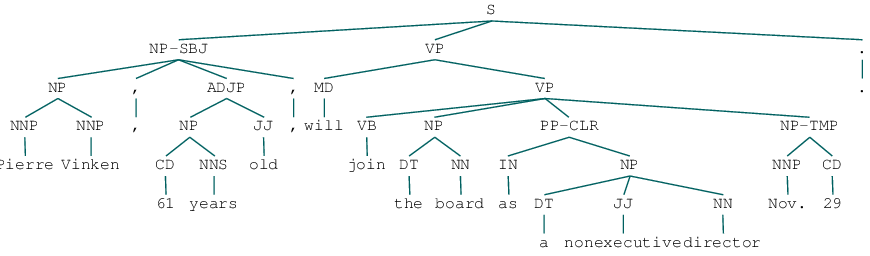

In [29]:
treebank.parsed_sents('wsj_0001.mrg')[0]
#treebank.parsed_sents('wsj_0001.mrg')[0].pretty_print(unicodelines=True)

---
### 2.4 Chunk Treebanks (partial, flat analysis of syntactic units)

#### Triple lists: &rarr; `(word, POS, IOB-Tag)`

https://www.nltk.org/howto/corpus.html


In [30]:
from nltk.corpus import conll2000, conll2002
print(conll2000.sents()[99])

['Over', 'a', 'cup', 'of', 'coffee', ',', 'Mr.', 'Stone', 'told', 'his', 'story', '.']


In [31]:
print(conll2000.iob_sents()[99])

[('Over', 'IN', 'B-PP'), ('a', 'DT', 'B-NP'), ('cup', 'NN', 'I-NP'), ('of', 'IN', 'B-PP'), ('coffee', 'NN', 'B-NP'), (',', ',', 'O'), ('Mr.', 'NNP', 'B-NP'), ('Stone', 'NNP', 'I-NP'), ('told', 'VBD', 'B-VP'), ('his', 'PRP$', 'B-NP'), ('story', 'NN', 'I-NP'), ('.', '.', 'O')]


In [32]:
print(conll2000.chunked_sents()[99])

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


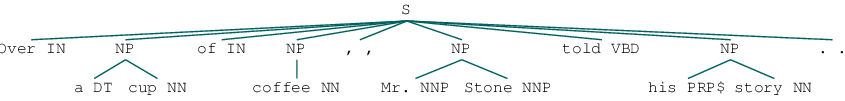

In [33]:
conll2000.chunked_sents(chunk_types=['NP'])[99]
#from nltk import Tree
#Tree.fromstring(str(conll2000.chunked_sents(chunk_types=['NP'])[99])).pretty_print()

---
### 2.5 Dependency Treebanks (dependency relations, syntactic functions, e.g. `nsubj`, `obj`)

#### Tokenlist with &rarr; Head-Dependency-Relations

https://www.nltk.org/howto/corpus.html

In [34]:
## http://www.nltk.org/howto/dependency.html
from nltk.corpus import dependency_treebank

In [35]:
t = dependency_treebank.parsed_sents()[1]
print(t.tree(), "\n")
print(t.to_conll(3), "\n")
t.tree().pretty_print(unicodelines=True)

(is
  (Vinken Mr.)
  (chairman (of (group (N.V. Elsevier) , the Dutch publishing)))
  .) 

Mr.	NNP	2
Vinken	NNP	3
is	VBZ	0
chairman	NN	3
of	IN	4
Elsevier	NNP	7
N.V.	NNP	12
,	,	12
the	DT	12
Dutch	NNP	12
publishing	VBG	12
group	NN	5
.	.	3
 

                is                             
 ┌────┬─────────┴─────┐                         
 │    │            chairman                    
 │    │               │                         
 │    │               of                       
 │    │               │                         
 │    │             group                      
 │    │     ┌───┬─────┼─────────┬─────────┐     
 │  Vinken  │   │     │         │        N.V.  
 │    │     │   │     │         │         │     
 .   Mr.    ,  the  Dutch   publishing Elsevier



---
### 2.6 Labeled Dependency Corpora

##### Universal Dependencies Corpus (German)

In [36]:
## first sentence DE-UD-DEV Corpus: https://github.com/UniversalDependencies/UD_German-GSD/tree/master
treebank = """1	Manasse	Manasse	PROPN	NN	Case=Nom|Gender=Fem|Number=Sing	5	nsubj	_	NamedEntity=Yes
2	ist	sein	AUX	VAFIN	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	5	cop	_	_
3	ein	ein	DET	ART	Case=Nom|Definite=Ind|Gender=Masc|Number=Sing|PronType=Art	5	det	_	_
4	einzigartiger	einzigartig	ADJ	ADJA	Case=Nom|Gender=Masc|Number=Sing	5	amod	_	_
5	Parfümeur	Parfümeur	NOUN	NN	Case=Nom|Gender=Masc|Number=Sing	0	ROOT	_	SpaceAfter=No
6	.	.	PUNCT	$.	_	5	punct	_	_
"""

Manasse	NN	5
ist	VAFIN	5
ein	ART	5
einzigartiger	ADJA	5
Parfümeur	NN	0
.	$.	5



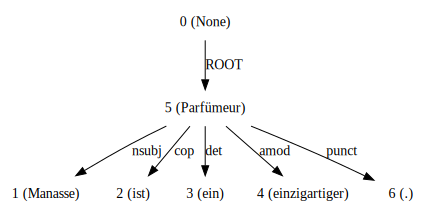

In [37]:
from nltk import DependencyGraph
t = DependencyGraph(treebank)
#print(t.tree())
print(t.to_conll(3))
#t.tree().pretty_print(unicodelines=True)
display(t)

---
## 3. Lexical Resources

---
### 3.1 Stop Word Lists

#### stop words = negative dictionary
- words that are filtered out during processing
- dependent on purpose, usually function words

https://www.nltk.org/book/ch02.html


In [38]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop[0:9]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you']

---
### 3.2 Word Lists in NLTK

#### word lists = dictionary within corpus (lexicon)
- criteria depending on purpose 

#####  Example: create list of unusal/mis-spelled words based on word list of common words, s. https://www.nltk.org/book/ch02.html

In [39]:
#nltk.words Corpus: The Words Corpus is the /usr/share/dict/words file from Unix, used by some spell checkers.
english_vocab = list(w.lower() for w in nltk.corpus.words.words())  
english_vocab[0:9]

['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf']

In [40]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha()) #The isalpha() method returns True if all characters in the string are alphabets. If not, it returns False.
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [41]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[1:10]

['abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations']

In [42]:
unusual_words(nltk.corpus.nps_chat.words())[1:10]

['aaahhhh',
 'abortions',
 'abou',
 'abourted',
 'abs',
 'ack',
 'acros',
 'actualy',
 'adams']

---
### 3.3 WordNet

#### = lexical database of semantic relations between words
- synonyms grouped into synsets

- https://www.nltk.org/book/ch02.html
- https://www.nltk.org/howto/wordnet.html


> WordNet® is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of conceptual-semantic and lexical relations.<br>https://wordnet.princeton.edu/



In [43]:
from nltk.corpus import wordnet as wn

In [44]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [45]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [46]:
wn.synset('car.n.02').lemma_names()

['car', 'railcar', 'railway_car', 'railroad_car']

---
### 3.4 FrameNet


#### = database with representations of situations, e.g. `Being_born`
- information about subcategorization frames



> The FrameNet corpus is a lexical database of English that is both human- and machine-readable, based on annotating examples of how words are used in actual texts. FrameNet is based on a theory of meaning called Frame Semantics, deriving from the work of Charles J. Fillmore and colleagues.<br>https://www.nltk.org/howto/framenet.html


In [47]:
from nltk.corpus import framenet as fn

In [48]:
fn.frames_by_lemma(r'born')

[<frame ID=793 name=Being_born>, <frame ID=973 name=People_by_age>]

In [49]:
f = fn.frame(793)

In [50]:
print(f.ID, f.name)

793 Being_born


In [51]:
print(f.definition)

This frame concerns the inception of the life of a Child, generally human, at a particular Time and Place.  The Relatives may also be mentioned.  'Little Jessie came into the world at 8 last night.'


In [52]:
len(f.lexUnit)

2

In [53]:
from pprint import pprint
pprint(sorted([x for x in f.FE]))

['Child', 'Depictive', 'Means', 'Place', 'Relatives', 'Time']


In [54]:
 print(f.lexUnit)

[come into the world.v] lexical unit (9790): come into the world.v

[definition]
  FN: be born.

[frame] Being_born(793)

[POS] V

[status] Created

[lexemes] come/V into/PREP the/ART world/N

[semTypes] 0 semantic types

[URL] https://framenet2.icsi.berkeley.edu/fnReports/data/lu/lu9790.xml

[subCorpus] 0 subcorpora
  

[exemplars] 0 sentences across all subcorpora

[born.v] lexical unit (9791): born.v

[definition]
  FN: existing as a result of birth.

[frame] Being_born(793)

[POS] V

[status] Created

[lexemes] born/V

[semTypes] 0 semantic types

[URL] https://framenet2.icsi.berkeley.edu/fnReports/data/lu/lu9791.xml

[subCorpus] 20 subcorpora
  V-429-s20-rcoll-daughter, V-429-s20-rcoll-son,
  V-510-s20-vping, V-540-s20-np-ap, V-550-s20-np-np,
  V-620-s20-np-ppother, V-670-s20-pass-by, V-680-s20-pass,
  V-700-s20-ap, V-720-s20-ppof, V-730-s20-ppby,
  V-730-s20-ppfrom, V-730-s20-ppin, V-730-s20-ppinto,
  V-730-s20-ppon, V-730-s20-ppto, V-730-s25-ppwith,
  V-810-s20-pother, V-890-s20

---
## 3. Basic Corpus Statistics

#### Loading Corpus:
Brown Corpus: first electronic English text corpus with 1 million words

In [55]:
from nltk.corpus import brown

---
### 3.1 Frequency Lists
https://www.nltk.org/book/ch02.html

#### text/corpus: list of word tokens
#### frequency list: list of word types, sorted by token frequency


- (cf. lexical resources/word lists as lists of word types)

### 3.1.2 Frequency List with NLTK: `FreqDist()` *(Frequency Distribution)*

In [56]:
from nltk import FreqDist
fd = FreqDist(brown.words())

In [57]:
fd.most_common(10)

[('the', 62713),
 (',', 58334),
 ('.', 49346),
 ('of', 36080),
 ('and', 27915),
 ('to', 25732),
 ('a', 21881),
 ('in', 19536),
 ('that', 10237),
 ('is', 10011)]

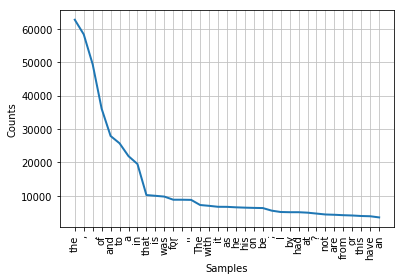

In [58]:
fd.plot(35, cumulative=False)

### 3.1.3 Conditional Frequency Lists: `ConditionalFreqDist()`

#### = frequency distributions under different conditions 

##### Example: different genres in Brown corpus

In [59]:
from nltk import ConditionalFreqDist

cfd_genre = ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre) if (word.lower() not in stop and not re.match(r"[^\w]", word)))

In [60]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [61]:
cfd_genre['romance'].most_common(10)

[('said', 330),
 ('would', 244),
 ('could', 193),
 ('like', 185),
 ('one', 166),
 ('back', 126),
 ('thought', 105),
 ("didn't", 101),
 ('little', 99),
 ('time', 93)]

In [62]:
cfd_genre['government'].most_common(10)

[('year', 183),
 ('States', 162),
 ('United', 155),
 ('may', 153),
 ('would', 120),
 ('made', 118),
 ('development', 112),
 ('one', 111),
 ('1', 107),
 ('years', 106)]

---
### 3.2 Concordances
https://www.nltk.org/book/ch01.html

#### = occurences in context
---

#### (Loading NLTK Book Corpus)

In [63]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [64]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


#### Retrieve words in similar contexts:

In [65]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


#### Retrieve shared contexts:

In [66]:
text1.common_contexts(["monstrous", "true"])

the_pictures


---
### 3.3 Collocations

#### = frequent n-grams (appear more frequent than expected) 


- n-gram: sequence of neighbouring words
- default: bigrams (n = 2)

https://www.nltk.org/book/ch01.html

https://www.nltk.org/howto/collocations.html


In [67]:
from nltk import bigrams
list(bigrams(['Call', 'me', 'Ishmael', '.']))

[('Call', 'me'), ('me', 'Ishmael'), ('Ishmael', '.')]

In [68]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


#### Association Measures: 

https://www.nltk.org/howto/collocations.html#association-measures

- e.g. Pointwise Mutual Information



In [69]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [70]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measures.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

---
### 3.4 Lexical Diversity
https://www.nltk.org/book/ch01.html

#### = type/token ratio

In [71]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [72]:
lexical_diversity(text3)

0.06230453042623537

In [73]:
lexical_diversity(text5)

0.13477005109975562

### 3.5 Distribution / Dispersion Plots

#### = plotting positional information of words (location in corpus)

(s. https://www.nltk.org/book/ch01.html)

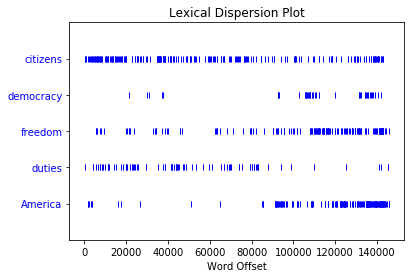

<Text: Inaugural Address Corpus>

In [74]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])
text4
# NumPy and Matplotlib needed for plotting

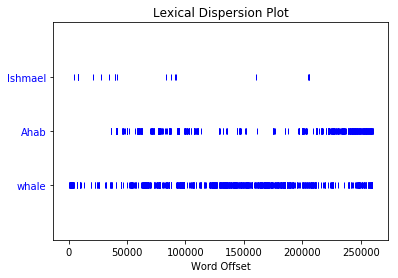

<Text: Moby Dick by Herman Melville 1851>

In [75]:
text1.dispersion_plot(["Ishmael","Ahab", "whale"])
text1

---
## &Uuml;bungsaufgaben 2


### Aufgabe 1 (Frequenzliste mit Python)
In der Vorlesung wurde die Frequenzliste mit der NLTK-Funktion `FreqDist()` berechnet. 

#### 1a: Berechnen Sie für folgende Tokenliste die Frequenzliste mit Python.
#### 1b: Verwenden Sie nun einen Counter der Collections-Library für die Frequenzlisten-Erstellung:
`collections import Counter`


In [76]:
text = ['Call', 'me', 'Ishmael', '.', 'Call', 'me', 'Ahab', '.', 'Call', 'him', 'Ahab', '.']

#### 1d: Führen Sie Efficiency Tests für die verschiedenen Berechnungsarten auf `wahlverwandschaften.txt` durch.  

- Verwenden Sie dafür die timeit-Library.
- Dazu muss die Frequenzlistberechnung als eine Funktion umgesetzt sein, die eine Tokenliste als Eingabeargument erwartet und eine Frequenzliste ausgibt.
- Übergeben Sie diese Funktion an den Timer (`countwords_def_test` im folgenden Beispielcode).

In [77]:
from nltk.tokenize import word_tokenize
raw_wahlverw = open('wahlverwandschaften.txt').read().lower()
wahlverw = word_tokenize(raw_wahlverw)
wahlverw[0:9]

['die',
 'wahlverwandtschaften',
 'ein',
 'roman',
 'von',
 'johann',
 'wolfgang',
 'von',
 'goethe']

In [78]:
def countwords_def_test(text):
    counts = {t:0 for t in text}    
    return counts
print(countwords_def_test(wahlverw[0:9]))

{'die': 0, 'wahlverwandtschaften': 0, 'ein': 0, 'roman': 0, 'von': 0, 'johann': 0, 'wolfgang': 0, 'goethe': 0}


In [79]:
import timeit, functools
t = timeit.Timer(functools.partial(countwords_def_test, wahlverw))
print(t.timeit(5)) #number of executions

0.006647047004662454


### Aufgabe 2 (Tokenisierung mit Python und NLTK)
Führen Sie auf `wahlverwandschaften.txt` verschiedene Varianten einer Tokenisierung durch. Verwenden Sie: 

- `split()`
- `re.findall()`
- `nltk.word_tokenize()`
- `nltk.regexp_tokenize()` (siehe https://www.nltk.org/book/ch03.html)


### Aufgabe 3 (gefilterte Frequenzliste mit NLTK)

Berechnen Sie  mit NLTK eine Stopwort-gefilterte Frequenzliste auf dem Brown-Korpus und plotten diese.

### Aufgabe 4 (Konkordanzen mit Python)

Berechnen Sie auf `wahlverwandschaften.txt` eine zeilenweise Konkordanz mit Python für den Suchterm 'geht'.

### Aufgabe 5 (Bigramme mit Python und NLTK)





#### 5a: Berechnen Sie auf `wahlverwandschaften.txt` eine Bigramm-Liste mit Python.

#### 5b: Testen Sie verschiedene NLTK-Bigramm-Assoziationsmaße und Frequency-Filter für einen Text ihrer Wahl:

In [80]:
#import nltk
from nltk.book import *

In [81]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [82]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measures.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

In [83]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measures.raw_freq, 10)

[(',', 'and'),
 ('of', 'the'),
 ("'", 's'),
 ('in', 'the'),
 (',', 'the'),
 (';', 'and'),
 ('to', 'the'),
 ('.', 'But'),
 (',', 'that'),
 ('.', '"')]